# A Tour of Model Checking using PyMC3

By Anon Y. Mous

In [1]:
# Partially adopted from https://docs.pymc.io/notebooks/posterior_predictive.html
# https://docs.pymc.io/notebooks/Bayes_factor.html
# https://docs.pymc.io/notebooks/model_comparison.html

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

In [2]:
RANDOM_SEED = 42
N = 100

true_a, true_b, predictor = 0.5, 3.0, np.random.normal(loc=2, scale=6, size=N)
true_mu = true_a + true_b * predictor
true_sd = 2.0

outcome = np.random.normal(loc=true_mu, scale=true_sd, size=N)

predictor.mean().round(2), predictor.std().round(2), outcome.mean().round(2), outcome.std().round(2)

(3.26, 5.78, 10.63, 17.73)

In [4]:
with pm.Model() as model_1:
    a = pm.Normal("a", 0.0, 10.0)
    b = pm.Normal("b", 0.0, 10.0)

    mu = a + b * predictor
    sd = pm.Exponential("sd", 1.0)

    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=outcome)
    prior_checks = pm.sample_prior_predictive(samples=50, random_seed=RANDOM_SEED)

Questions:

What is a reasonable prior here?
What will the prior predictive show if our is bad?

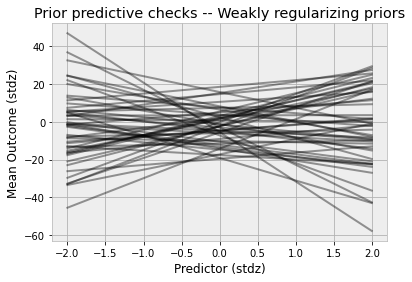

In [5]:

_, ax = plt.subplots()

x = np.linspace(-2, 2, 50)

for a, b in zip(prior_checks["a"], prior_checks["b"]):
    y = a + b * x
    ax.plot(x, y, c="k", alpha=0.4)

ax.set_xlabel("Predictor (stdz)")
ax.set_ylabel("Mean Outcome (stdz)")
ax.set_title("Prior predictive checks -- Weakly regularizing priors");



In [8]:
with pm.Model() as model_1:
    a = pm.Normal("a", 0.0, 0.5)
    b = pm.Normal("b", 0.0, 1.0)

    mu = a + b * predictor
    sd = pm.Exponential("sd", 1.0)

    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=outcome)
    prior_checks = pm.sample_prior_predictive(samples=50, random_seed=RANDOM_SEED)

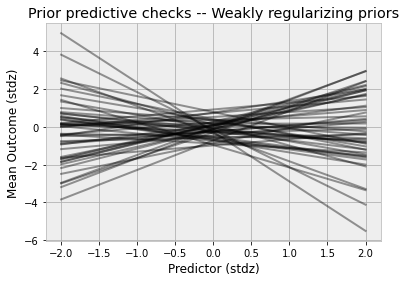

In [9]:


_, ax = plt.subplots()

x = np.linspace(-2, 2, 50)

for a, b in zip(prior_checks["a"], prior_checks["b"]):
    y = a + b * x
    ax.plot(x, y, c="k", alpha=0.4)

ax.set_xlabel("Predictor (stdz)")
ax.set_ylabel("Mean Outcome (stdz)")
ax.set_title("Prior predictive checks -- Weakly regularizing priors");



Questions:

What are some other assumptions we might want to make?